In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Usar glob para encontrar todos los archivos CSV que empiezan con "run_"
csv_files = glob.glob('run_*.csv')

# Lista para guardar los DataFrames
dataframes = []

# Leer cada archivo CSV y añadirlo a la lista
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Combinar todos los DataFrames en uno solo
master_df = pd.concat(dataframes, ignore_index=True)

# Configurar un estilo visual más bonito para los gráficos
plt.style.use('seaborn-v0_8-whitegrid')

# Opcional: Imprime el DataFrame para verificar que todo se cargó
print("Datos cargados exitosamente:")
print(master_df[['SampleSize', 'NumWorkers', 'TiempoCalculo_s', 'TiempoTotal_s']].sort_values(by=['SampleSize', 'NumWorkers']))

Datos cargados exitosamente:
    SampleSize  NumWorkers  TiempoCalculo_s  TiempoTotal_s
4        10000           4        70.864870      72.823221
5        10000           8        43.915126      45.911130
0        10000          12        41.843654      43.803005
1        10000          16        40.296869      42.292879
2        10000          20        39.841617      41.800468
3        10000          24        39.421581      41.419101
10       30000           4       731.187598     733.179213
11       30000           8       543.344090     545.303604
6        30000          12       509.010237     510.971083
7        30000          16       515.783665     518.115369
8        30000          20       501.080648     503.045077
9        30000          24       517.973659     519.991908
16       50000           4      3065.402688    3067.344446
17       50000           8      2481.197793    2483.165433
12       50000          12      2711.059706    2713.202288
13       50000          16 

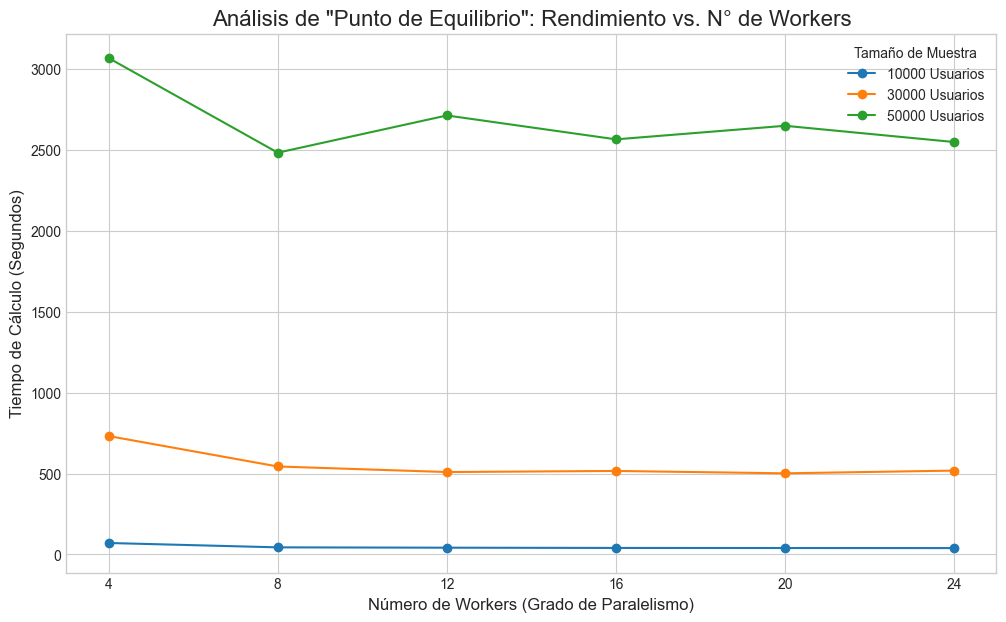

In [3]:
# Crear la figura para el gráfico
plt.figure(figsize=(12, 7))

# Iterar sobre cada SampleSize único para dibujarlo como una línea separada
for size in sorted(master_df['SampleSize'].unique()):
    # Filtrar los datos para este tamaño de muestra
    df_size = master_df[master_df['SampleSize'] == size]
    
    # Ordenar por NumWorkers para que la línea se dibuje correctamente
    df_size = df_size.sort_values('NumWorkers')
    
    # Dibujar la línea
    plt.plot(df_size['NumWorkers'], 
             df_size['TiempoCalculo_s'], 
             marker='o', 
             linestyle='-', 
             label=f'{size} Usuarios')

# Añadir títulos y etiquetas
plt.title('Análisis de "Punto de Equilibrio": Rendimiento vs. N° de Workers', fontsize=16)
plt.xlabel('Número de Workers (Grado de Paralelismo)', fontsize=12)
plt.ylabel('Tiempo de Cálculo (Segundos)', fontsize=12)
plt.legend(title='Tamaño de Muestra')
plt.grid(True)
plt.xticks(master_df['NumWorkers'].unique()) # Asegura que todos los N° de workers aparezcan en el eje X

# Guardar el gráfico como imagen
plt.savefig('grafico_punto_equilibrio.png')

# Mostrar el gráfico
plt.show()

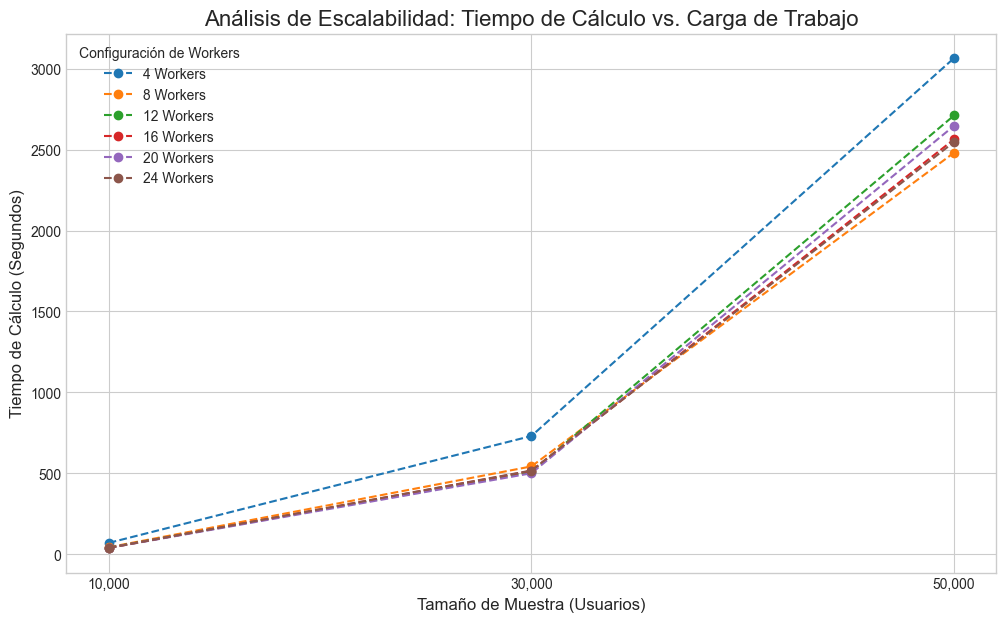

In [4]:
# Crear la figura para el gráfico
plt.figure(figsize=(12, 7))

# Iterar sobre cada NumWorkers único para dibujarlo como una línea separada
for workers in sorted(master_df['NumWorkers'].unique()):
    # Filtrar los datos para este número de workers
    df_worker = master_df[master_df['NumWorkers'] == workers]
    
    # Ordenar por SampleSize para que la línea se dibuje correctamente
    df_worker = df_worker.sort_values('SampleSize')
    
    # Dibujar la línea
    plt.plot(df_worker['SampleSize'], 
             df_worker['TiempoCalculo_s'], 
             marker='o', 
             linestyle='--', 
             label=f'{workers} Workers')

# Añadir títulos y etiquetas
plt.title('Análisis de Escalabilidad: Tiempo de Cálculo vs. Carga de Trabajo', fontsize=16)
plt.xlabel('Tamaño de Muestra (Usuarios)', fontsize=12)
plt.ylabel('Tiempo de Cálculo (Segundos)', fontsize=12)
plt.legend(title='Configuración de Workers')
plt.grid(True)

# Formatear el eje X para que muestre números enteros (ej. 10,000 en lugar de 10.0k)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(master_df['SampleSize'].unique())

# Guardar el gráfico como imagen
plt.savefig('grafico_escalabilidad.png')

# Mostrar el gráfico
plt.show()